# Airbnb in Boston: Exploring the Data

Airbnb has transformed the travel industry as Uber has the transportation industry. Once confined to hotels and motels, people can now stay in the homes of hosts in most any place you can think of. Customers can take their pick of living space, neighborhood and price by downloading an app on their smartphone. Have you ever wondered what Airbnb prices are like in different cities, say Boston for example? Today, we'll be doing just that: working with a dataset for Boston Airbnbs then bringing in data from Chicago and NYC for comparison. 

Using Pandas and Seaborn, the main questions I want to answer today are:  
-What do Boston Airbnbs look like? (How many are on a boat and how many in a house?)  
-How do the prices of different neighborhoods compare to one another?  
-How does Boston's prices stack up against Chicago and NYC?

The datasets were aquired from Insideairbnb.com, a website that is unassociated with Airbnb. The data is scraped from publicly available Airbnb listings and review data that can be found on their own website. Originally, I was using a less detailed dataset from Insideairbnb.com but chose to use a more expansive dataset as it has more interesting variables. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Boston DataFrame

In [2]:
initial_boston = pd.read_csv("Desktop/listings-5.csv")

In [3]:
# Let's find out the size of this DataFrame
len(initial_boston)

6264

In [4]:
# Let's see what it looks like
pd.set_option('display.max_columns', len(initial_boston.columns)) # So we can see all columns
initial_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190714024644,2019-07-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,80%,NaN,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4.0,4.0,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.36524,-71.02936,t,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,30,30,1125,1125,30.0,1125.0,5 days ago,t,10,28,28,99,2019-07-14,15,1,2015-07-10,2019-02-22,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Massachusetts State"","" Massachusetts State""}",f,f,super_strict_30,f,f,1,1,0,0,0.31
1,5506,https://www.airbnb.com/rooms/5506,20190714024644,2019-07-14,**$99 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/user

As you can see, it's a large-sized dataset. 106 columns is a lot, although there are several columns with values that are either blank or useless for our purposes. First, let's see which ones are blank.

In [5]:
# Finding which columns contain mostly blank values by summing the isnull() function
pd.set_option('display.max_rows', 106) # So we can see all columns, this time in row form
initial_boston.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               1
summary                                          139
space                                           1651
description                                       65
experiences_offered                                0
neighborhood_overview                           1989
notes                                           2505
transit                                         2204
access                                          2541
interaction                                     2294
house_rules                                     1999
thumbnail_url                                   6264
medium_url                                      6264
picture_url                                        0
xl_picture_url                                

Deciding which columns to keep comes down to deciding which variables will be useful to graph. Dropping each column that is useless for our purposes would take too long since there are so many, so instead let's just copy the dataset and grab the columns we want. 

In [6]:
boston = initial_boston[['name', 'host_since', 'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'bathrooms', 'beds', 'amenities', 'price', 'cancellation_policy']]

In [7]:
boston.tail()

,name,host_since,neighbourhood_cleansed,zipcode,property_type,room_type,bathrooms,beds,amenities,price,cancellation_policy
6259,room 3,2018-07-05,Dorchester,02125,House,Private room,1.0,1,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",$50.00,strict_14_with_grace_period
6260,room 4,2018-07-05,Dorchester,02125,House,Private room,1.0,1,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",$50.00,strict_14_with_grace_period
6261,Entire Loft townhouse perfect for whole family,2016-10-13,West Roxbury,02467,Townhouse,Entire home/apt,1.0,1,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$120.00,flexible
6262,Private condo great for work trips,2011-03-25,South End,02118,Condominium,Entire home/apt,1.5,3,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$200.00,flexible
6263,Charming Back Bay 1 bedroom,2019-07-13,Back Bay,02215,Apartment,Entire home/apt,1.0,1,"{TV,Wifi,""Air conditioning"",Heating,""Smoke det...",$135.00,flexible


Looking at the last 5 entries in our new dataset, there are no more columns with NaN (not a number) entries, which is great. While some of the data we got rid of could be useful for a lengthier study, we will not be using it for our purposes. 

## Graphing host_since:

First off, let's see what the Boston Airbnb market has looked like since Airbnb was founded in 2008. Did they get to Boston the same year? Let's find out. 

In [8]:
pd.options.mode.chained_assignment = None 
boston['host_since'] = pd.to_datetime(boston['host_since'])  # converting object to datetime

In [9]:
print(f"First Boston Airbnb host: {min(boston.host_since).strftime('%d %B %Y')}. \nMost recent join: {max(boston.host_since).strftime('%d %B %Y')}.")

First Boston Airbnb host: 03 December 2008. 
Most recent join: 13 July 2019.


Text(0.5, 0.98, 'Boston Hosts Joining Airbnb by Business Quarter')

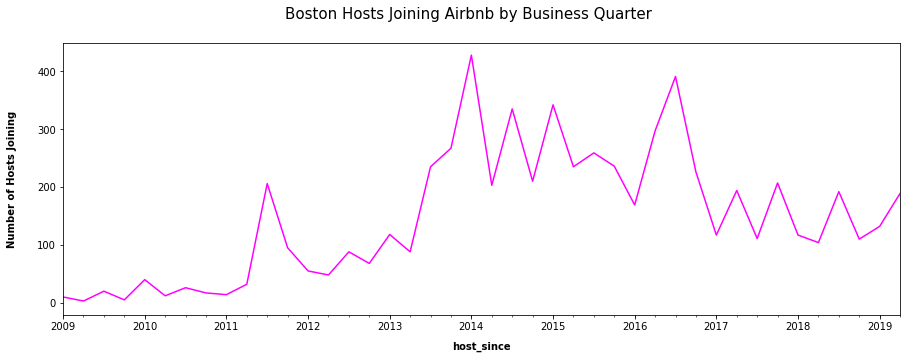

In [10]:
plt.figure(figsize=(15,5))
boston.set_index('host_since').resample('Q').size().plot(color='magenta') 
# Using the resample feature, plotting the quantity of hosts joining Airbnb in Boston by 
# business quarter ('Q'). We'll exclude the first quarter in the dataset since it only included December 2018
# and the last quarter since it only included early July 2019. 
plt.xlim('2009-01-01', '2019-06-30') # excluding the few July 2019 and Dec 2018 dates
plt.ylabel("Number of Hosts Joining", labelpad = 20, weight='bold')
plt.xlabel("host_since", labelpad=10, weight='bold')
plt.suptitle("Boston Hosts Joining Airbnb by Business Quarter", size = 15)

I sorted the line graph by quarter because months were a bit too segmented and years didn't give a detailed enough picture. Airbnb hosts started joining slowly between 2009-2011, and 2011 saw a huge spike in listings in that third quarter. Listings added really picked up in 2013 and peaked in 2014. Over 100 have been added each quarter since then. 

## Room and Property types:

Now that there are so many listings in Boston available, what do they look like? The room_type column has three values for any city's dataset while the property_type column can have any range of values. Let's take a look at what they look like for Boston. 

#### Room_type:

Text(0, 0.5, '')

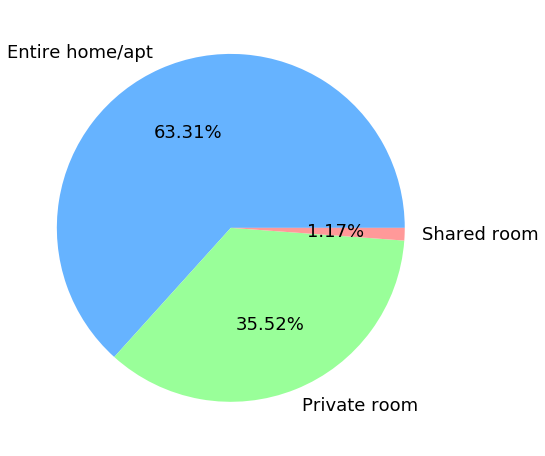

In [11]:
plt.style.use('ggplot')
bostonrooms = boston.room_type.value_counts()
bostonrooms.plot(kind="pie",
                legend = False,
                figsize=(8,8), 
                colors = ['#66b3ff','#99ff99','#ff9999'], # Get colors that pop
                fontsize = 18, autopct = '%.2f%%', # Round to 2 decimals and include % sign
                )
plt.ylabel('') # Hide the y-label ("room_type")

Unsuprisingly, Boston listings are mostly apartments and entire homes rather than private rooms or shared apartments. If you look on Inside Airbnb's data visualization for Boston (http://insideairbnb.com/boston/) it's clear that most of the private room listings are further away from downtown Boston. 


#### Property_type:

To restate the parenthetical in the introduction: How many listings are on a boat and how many are in a house?

Text(0.5, 0, 'Property Type')

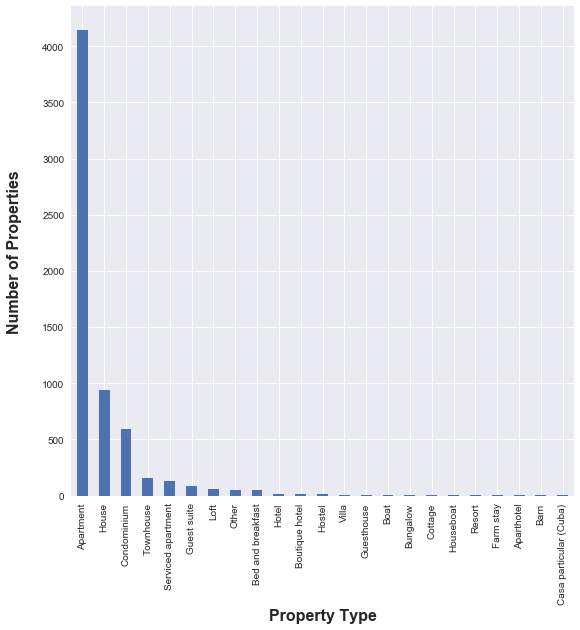

In [12]:
plt.style.use('seaborn')
bostonproperties = boston.property_type.value_counts()
bostonproperties.plot(kind="bar",
                legend = False,
                figsize=(9,9))
plt.ylabel('Number of Properties', labelpad=20, size = 16, weight='bold')
plt.xlabel('Property Type', size = 16, weight = 'bold')

In [13]:
boston.property_type.value_counts()

Apartment                 4148
House                      943
Condominium                589
Townhouse                  153
Serviced apartment         126
Guest suite                 83
Loft                        56
Other                       49
Bed and breakfast           46
Hotel                       13
Boutique hotel              13
Hostel                      10
Villa                        9
Guesthouse                   6
Boat                         6
Bungalow                     5
Cottage                      2
Houseboat                    2
Resort                       1
Farm stay                    1
Aparthotel                   1
Barn                         1
Casa particular (Cuba)       1
Name: property_type, dtype: int64

Apartments clearly reign supreme in the Boston Airbnb world, making up nearly two-thirds of the market. Houses and condominiums represent the second tier of the market followed by an assortment of different property types ranging from townhouses to lofts to boats, the latter of which accounts for six listings in the dataset. That's six more than Kansas City. 

#### How do these property types stack up against each other in terms of pricing?

In [14]:
# First we have to take the $ sign out of the price column. Thanks, Insideairbnb.
boston['price'] = boston['price'].str.replace(',', '')
boston['price'] = boston['price'].str.replace('$', '')
boston['price'] = boston['price'].astype(float)

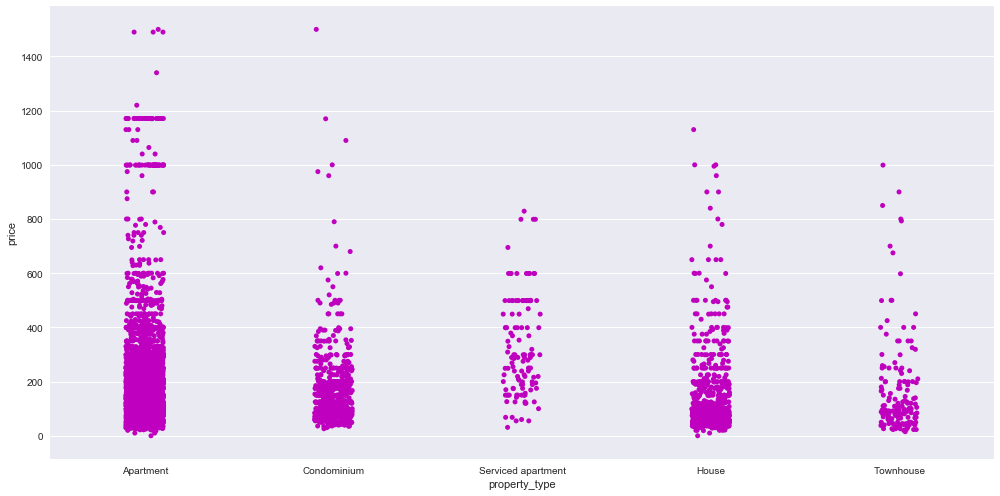

In [15]:
# Let's look at the top 5 property types:
top5_properties = boston.loc[boston['property_type'].isin(['Apartment', 'House', 'Condominium', 'Townhouse', 'Serviced apartment'])]

# Exclude any extreme prices, say any over 1500
to_drop = top5_properties[top5_properties.price > 1500].index
top5_properties.drop(to_drop, inplace = True)

# Plot this bad boy
sns.catplot('property_type', 'price', data = top5_properties, color = 'm', \
               estimator = np.median, height = 7,  aspect=2)

Apartments, being the most common property type, are the most dense on the graph. Condominiums seem to be a tad more expensive than houses, on average, although there are more houses. Serviced apartments are pretty evenly distributed while there are a good amount of cheap townhouses. Overall, there isn't too much surprising about this graph. 

To recap: we learned that about 63% of room types in Boston Airbnbs are the entire room or apartment while 35% are a private room. Apartments make up the vast majority of listings and are followed by a whole variety of different property types. It's time to get inside these listings and find out what kind of offerings Boston Airbnb goers can expect. 

## Beds and Bathrooms:

While the two B's of Airbnb stand for Bed and Breakfast, the two B's for our purposes will be Beds and Bathrooms. Using boxplots, let's visualize how price is affected by the number of beds or bathrooms. The small black diamonds outside of the brackets in the boxplot represent outliers (determined by a Python algorithm).

In [16]:
boston.beds.value_counts()

1     3440
2     1564
3      774
4      244
5      102
6       51
7       22
0       15
8       15
9       10
10       7
11       5
12       5
16       4
13       2
17       2
24       1
19       1
Name: beds, dtype: int64

We can exclude listings with 9+ beds as they represent a tiny portion of the dataset. 

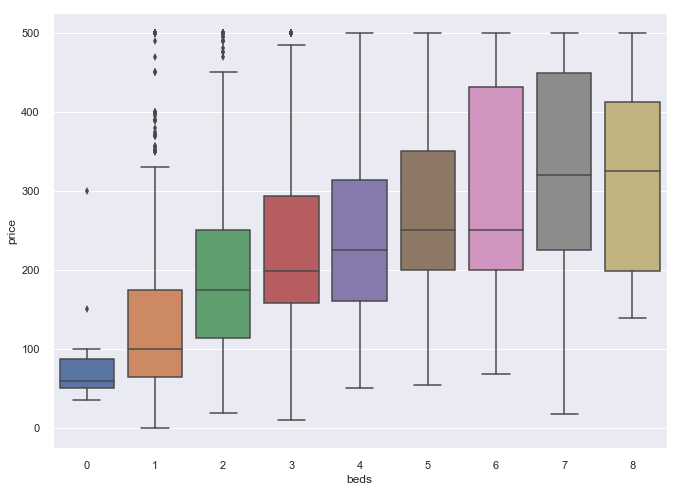

In [17]:
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(y='price', x='beds', 
            data = boston.loc[(boston.price <= 500) & (boston.beds < 9)]) # excluding price outliers as well

After excluding any extreme datapoints, the boxplot is as expected. Median prices goes up for every bed increase in the graph and while there are outliers for every # beds on the graph, the Seaborn boxplot feature does a great job of sorting those out. 

#### Now for bathrooms:

In [18]:
boston.bathrooms.value_counts()

1.0    4640
2.0    1023
1.5     346
2.5     127
3.0      68
3.5      27
0.0      10
4.0       9
0.5       7
4.5       2
6.0       1
5.0       1
Name: bathrooms, dtype: int64

Since there is only 1 listing each with 5 or 6 bathroom and 2 with 4.5, we can exclude those listings. 

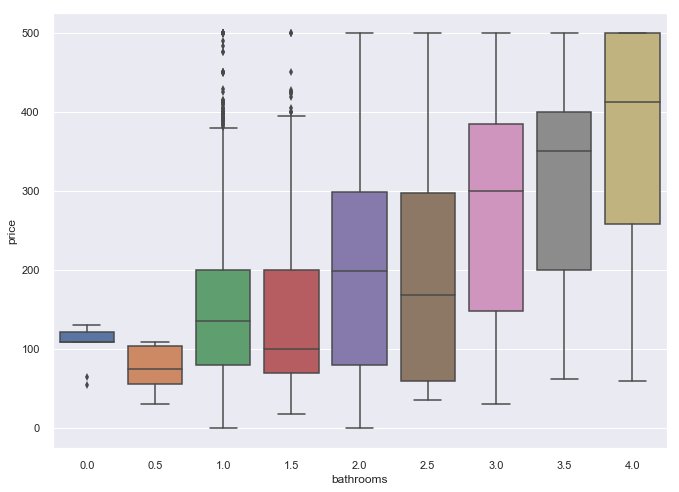

In [19]:
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(y='price', x='bathrooms', 
            data = boston.loc[(boston.price <= 500) & (boston.bathrooms <= 4)]) 

The effect of bathrooms on a listing's price follows a similar trend to that of beds. While the median price doesn't steadily increase for each value on the x-axis, it does for those values without half a bathroom (a bathroom without a shower). Perhaps those are valued differently somehow. 

#### Comparing Beds and Bathrooms Using a Heatmap:

How do beds and bathrooms stack up against *each other*? The best way to see this will be to use Seaborn's heatmap feature. 

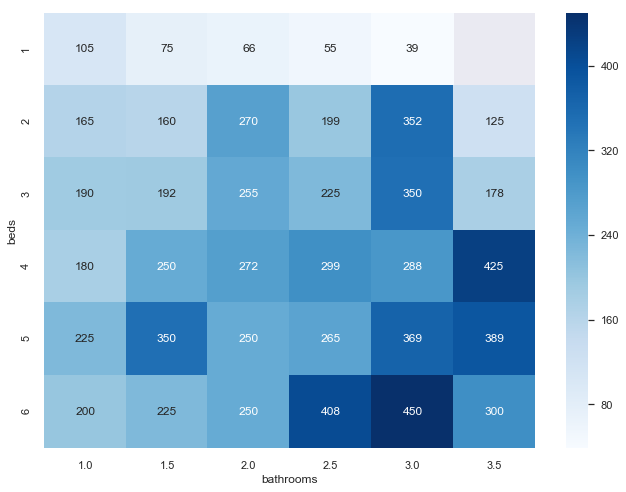

In [20]:
# bostonbb = boston beds/bathrooms (aka our dataset without outliers)
bostonbb = boston.loc[(boston.price <= 500) & (boston.bathrooms <= 3.5) & (boston.bathrooms >= 1) & (boston.beds < 7) & (boston.beds >= 1)] 

sns.heatmap(bostonbb.groupby([
        'beds', 'bathrooms']).price.median().unstack(),annot=True, fmt=".0f", cmap="Blues")

As beds and bathrooms increase, so does the listing's price. From the value counts in this section above, the vast majority (4640) of listings offer one bathroom and a slight majority (3440) offer one bedroom. Those listings that offer both go for a median price of 105. Upgrade that to two bedrooms and bathrooms and the median price jumps to 270. The trend continues: if you'd like 3 beds with 3 bathrooms, you better be splitting that 350 amongst friends.

Overall, there wasn't too much surprising about beds and bathrooms. Perhaps the most surprising thing is just how expensive it already appears Boston listings are. We'll get a closer look at that in the next section. 

## Boston Neighborhoods:

Finally, let's take a look at Boston's neigborhoods. The dataset has a column called neighbourhood_cleansed which contains many different Boston neighborhoods. The original neighborhood column, "neighbourhood", has a few more neighborhoods that can easily be grouped together.

In [21]:
# First off, let's see how many different neighbourhoods it contains:
boston.neighbourhood_cleansed.nunique()

25

Text(0.5, 0.98, 'Boston Neighborhood Frequency')

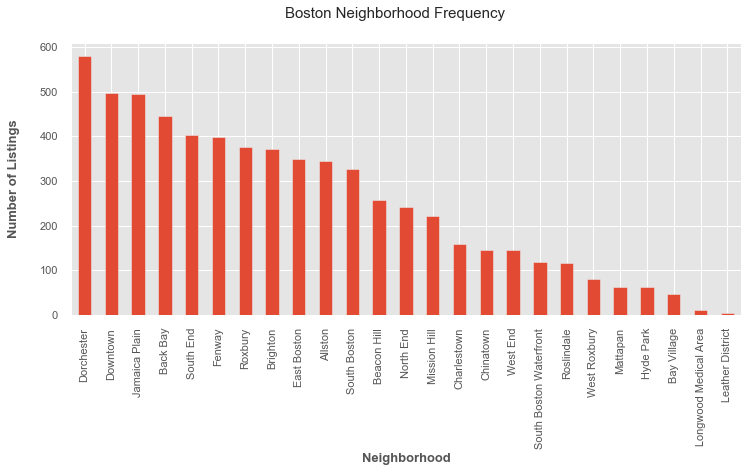

In [22]:
# Let's graph the value counts of these neighbourhoods to visualize how they stack up against each other:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
hood = boston.neighbourhood_cleansed.value_counts()
hood.plot(kind="bar")
plt.xlabel("Neighborhood", size = 13, weight='bold')
plt.ylabel("Number of Listings", labelpad=20, size = 13, weight='bold')
plt.suptitle("Boston Neighborhood Frequency", size = 15)

Dorchester is the only neighborhood to have over 500 listings while Leather District has just 5. I was curious to see how the most popular Boston neighborhoods (the top 5 being Dorchester, Downtown, Jamaica Plain, Back Bay, and the South End) stacked up against each other in terms of price. 

In [23]:
# Let's grab the top 5 for a new dataframe:
boston_top5 = boston.loc[boston['neighbourhood_cleansed'].isin(['Dorchester', 'Downtown', 'Jamaica Plain', 'Back Bay', 'South End'])]
# Now let's exclude the pricing outliers, say over 500:
bostontop5 = boston_top5[boston_top5.price < 500]

In [24]:
print(len(bostontop5))
print(len(bostontop5)/len(boston))

2302
0.3674968071519796


These top 5 neighborhoods represent 36.75% of Boston's Airbnb listings. 

To see how the top 5 neighborhoods compare in terms of price, let's use Seaborn's violin plot:

Text(0.5, 1.0, 'Distribution of Prices per Neighbourhood')

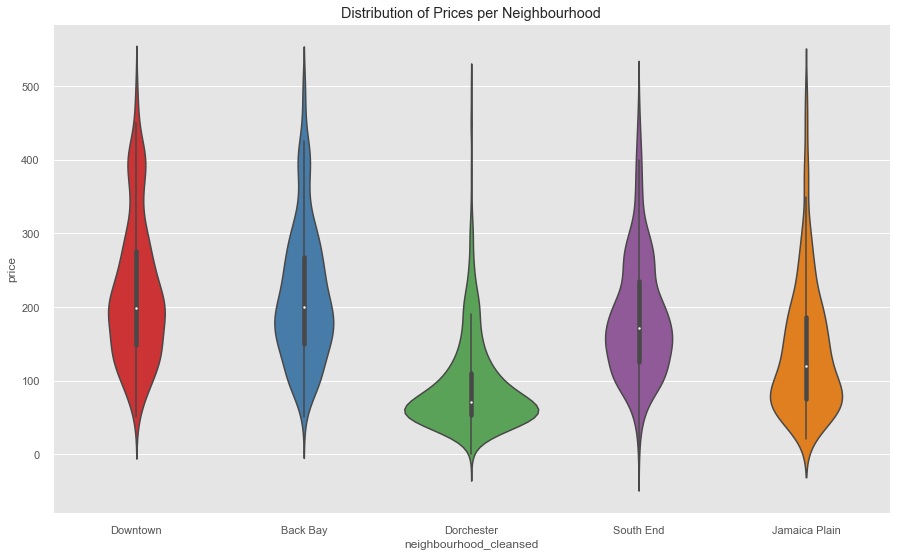

In [36]:
dims = (15, 9)
fig, ax = plt.subplots(figsize=dims)
viol_boston = sns.violinplot(data=bostontop5, x='neighbourhood_cleansed', 
                             y='price', 
                             palette = 'Set1')
viol_boston.set_title('Distribution of Prices per Neighbourhood')

Dorchester, the most popular neighborhood, is the least expensive of the top 5 with a median price of 170. Jamaica Plain is the second cheapest while Downtown, Back Bay and the South End all run on the more expensive side. 

## How does Boston stack up against Chicago and NYC?

To find out, let's import the data for the two cities:

In [26]:
chi = pd.read_csv("Desktop/listings-3.csv")

In [27]:
nyc = pd.read_csv("Desktop/listings-4.csv")

#### First, let's tackle Chicago:

In [28]:
# What are the top 5 Chicago neighbourhoods?
chi.neighbourhood.value_counts().head()

West Town          1096
Near North Side     805
Lake View           773
Logan Square        573
Lincoln Park        432
Name: neighbourhood, dtype: int64

In [29]:
# For comparison
boston.neighbourhood_cleansed.value_counts().head()

Dorchester       580
Downtown         497
Jamaica Plain    495
Back Bay         446
South End        403
Name: neighbourhood_cleansed, dtype: int64

Chicago's top neighborhoods are larger than Boston's. Let's see how their prices stack up against each other in the violin plot. Which city do you think will be more expensive?

In [30]:
# Grab the top 5 for a new dataframe:
chi_top5 = chi.loc[chi['neighbourhood'].isin(['West Town', 'Near North Side', 'Lake View', 'Logan Square', 'Lincoln Park'])]
# Now let's exclude the price outliers over 500:
chitop5 = chi_top5[chi_top5.price < 500]

Text(0.5, 1.0, 'Distribution of Prices per Chicago Neighbourhood')

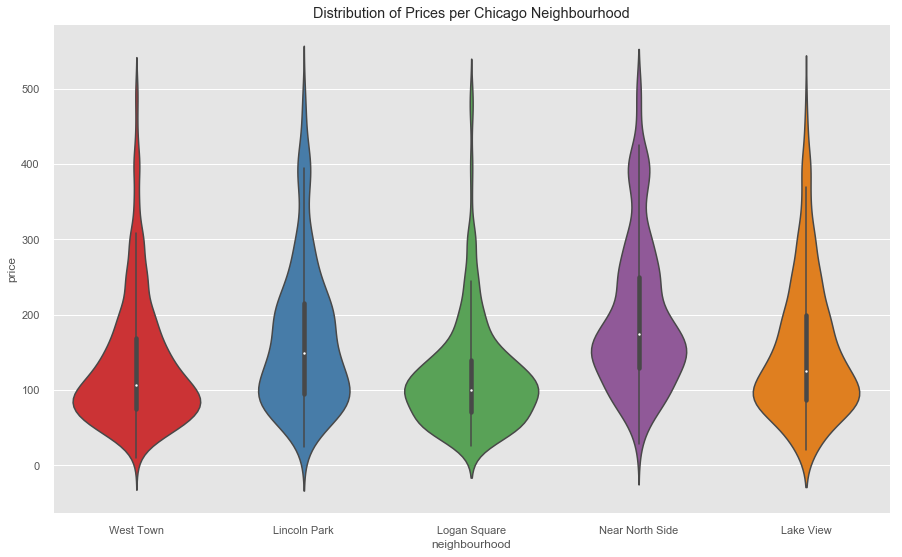

In [37]:
dims = (15, 9)
fig, ax = plt.subplots(figsize=dims)
viol_chi = sns.violinplot(data=chitop5, x='neighbourhood', 
                             y='price', 
                             palette = 'Set1')
viol_chi.set_title('Distribution of Prices per Chicago Neighbourhood')

#### Let's see the two plots next to each other:

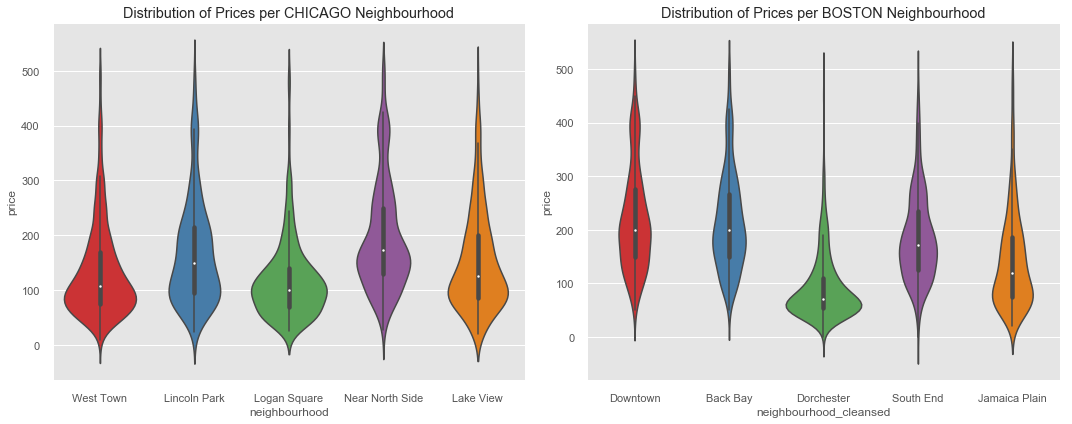

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))  # 1 row, 2 columns
viol_chi = sns.violinplot(data=chitop5, x='neighbourhood', 
                             y='price', 
                             palette = 'Set1',
                             ax = ax1)
viol_chi.set_title('Distribution of Prices per CHICAGO Neighbourhood')
viol_boston = sns.violinplot(data=bostontop5, x='neighbourhood_cleansed', 
                             y='price', 
                             palette = 'Set1',
                            ax = ax2)
viol_boston.set_title('Distribution of Prices per BOSTON Neighbourhood')
plt.tight_layout()

Boston's top neighborhoods are hands-down pricier than Chicago's, something that I didnt' completely expect. Dorchester's median price is cheaper than that of every top Chicago neighborhood, but Chicago's top median price in the graph (Near North Side) is around that of Boston's third highest median price (South End). The shapes of the graph themselves certainly tell a story: Chicago's neighborhoods are shaped more like Dorchester than Boston's Downtown, which contains more high-end listings. 

Let's check if the trend of Chicago being less expensive holds up for both datasets as a whole by looking at some descriptive stats:

In [39]:
print("                   PRICE")
print(f"Chicago's mean: {round(chi.price.mean())}    Chicago's median: {round(chi.price.median())}")
print(f"Boston's mean: {round(boston.price.mean())}     Boston's median: {round(boston.price.median())}")

                   PRICE
Chicago's mean: 164    Chicago's median: 100
Boston's mean: 199     Boston's median: 149


Yup, the trend holds up. Chicago's Airbnb prices are less expensive as a whole and amongst the top 5 neighborhoods. 

### Now for NYC versus Boston:

In [40]:
# What are the top 5 NYC neighbourhoods?
nyc.neighbourhood.value_counts().head()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [41]:
# vs Boston
boston.neighbourhood_cleansed.value_counts().head()

Dorchester       580
Downtown         497
Jamaica Plain    495
Back Bay         446
South End        403
Name: neighbourhood_cleansed, dtype: int64

As would be anticipated, NYC's top neighborhoods dwarf Boston's in comparison. Which city's top neighborhoods do you expect to be pricier?

In [42]:
# Grab the top 5 for a new dataframe:
nyc_top5 = nyc.loc[nyc['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side'])]
# Now let's exclude the price outliers over 500:
nyctop5 = nyc_top5[nyc_top5.price < 500]

Text(0.5, 1.0, 'Distribution of Prices per Neighbourhood')

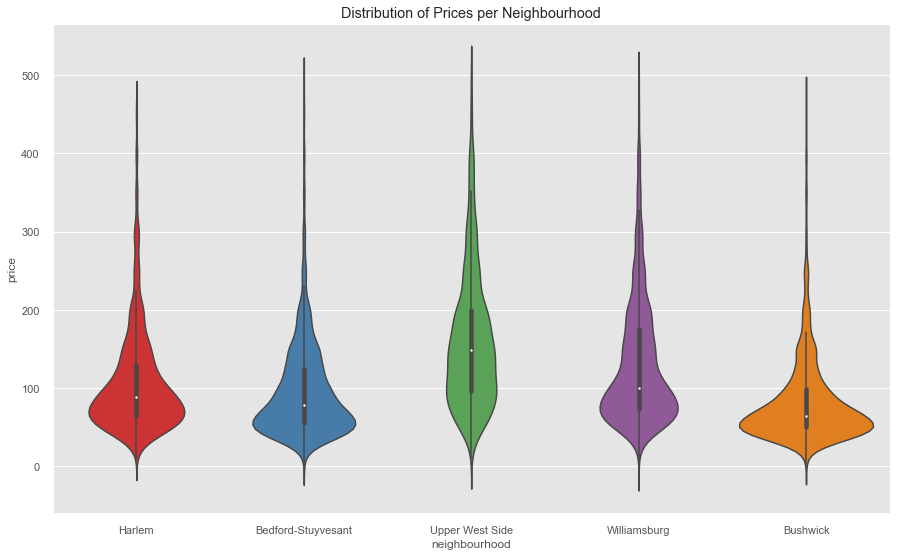

In [44]:
dims = (15, 9)
fig, ax = plt.subplots(figsize=dims)
viol_nyc = sns.violinplot(data=nyctop5, x='neighbourhood', 
                             y='price', 
                             palette = 'Set1')
viol_nyc.set_title('Distribution of Prices per Neighbourhood')

#### Let's see the two plots next to each other:

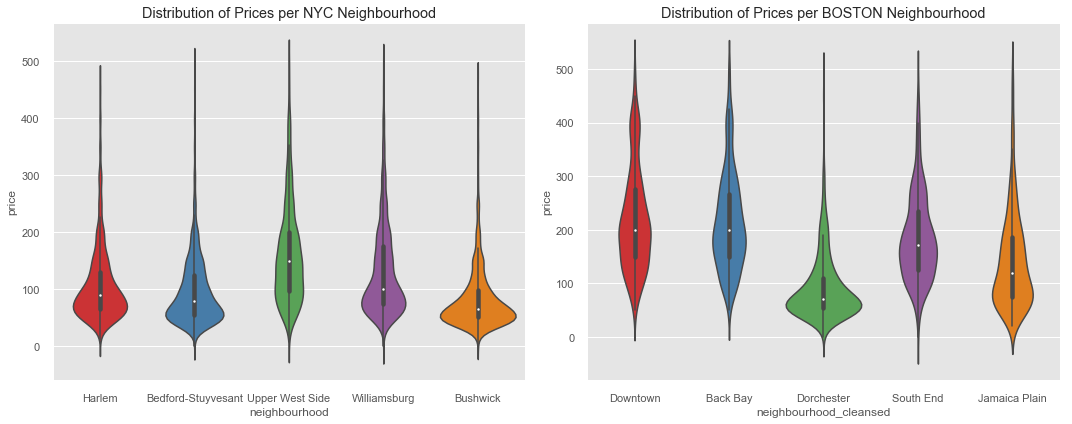

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))  # 1 row, 2 columns
viol_nyc = sns.violinplot(data=nyctop5, x='neighbourhood', 
                             y='price', 
                             palette = 'Set1',
                             ax = ax1)
viol_nyc.set_title('Distribution of Prices per NYC Neighbourhood')
viol_boston = sns.violinplot(data=bostontop5, x='neighbourhood_cleansed', 
                             y='price', 
                             palette = 'Set1',
                            ax = ax2)
viol_boston.set_title('Distribution of Prices per BOSTON Neighbourhood')
plt.tight_layout()

Boston's top neighborhoods are pricier than NYC's. While Dorchester and Jamaica Plain are in the same range as NYC's top neigborhoods, Downtown, Backbay and South End only resemble the shape of Upper West Side, really.   

All in all, we have to take these findings with a grain of salt. While they do represent a pretty vast amount of listings, the prices in the dataset are not the average price paid, they are the price listed as a starting negotiating point, according to Inside Airbnb. That being said, it's pretty safe to say that the most common Boston Airbnbs are more expensive than their NYC and Chicago counterparts. 

In [46]:
# Again, let's look at some descriptive stats for Boston and NYC to see if this trend represents the whole dataset. 
print("                 PRICE")
print(f"NYC's mean: {round(nyc.price.mean())}        NYC's median: {round(nyc.price.median())}")
print(f"Boston's mean: {round(boston.price.mean())}     Boston's median: {round(boston.price.median())}")

                 PRICE
NYC's mean: 153        NYC's median: 106
Boston's mean: 199     Boston's median: 149


Boston's pricier than NYC confirmed. 

## Conclusion

We found out a lot about the world of Boston Airbnbs from the columns we looked at. Some main takeways:  

-It took a couple of years for Airbnbs to pick up in Boston after the company was founded in 2008, as is probably true for every city, but the number of listings has grown immensely since 2011.   
-The most common room and property type in Boston is a private room and apartment, respectively.   
-Most listings have one or two beds/bathrooms; if you want more, be prepared to pay.   
-Boston's top neighborhoods are *pricy*. I knew they were going to be pricy but thought that NYC would compare a bit more than it did. Dorchester and Jamaica Plain are affordable but outside of that, the top neighborhoods aren't cheap.

There's a ton more of information in the dataset that could be studied. I've come across analyses that use Machine Learning to try to predict the price of listings, something that in the future I'll hopefully know how to do. For now, this was a good, fun overview of the landscape of Boston's Airbnbs. I hoped you enjoyed reading it as much as I enjoyed writing it.  

## Extra credit: Zipcodes

Here's a little graph of the top zipcodes if you're interested. The value counts went to single digits after the 27th most popular zipcode, hence the cut-off. 

Is yours in there?

Text(0.5, 0.98, 'Boston Listings Per Zipcode')

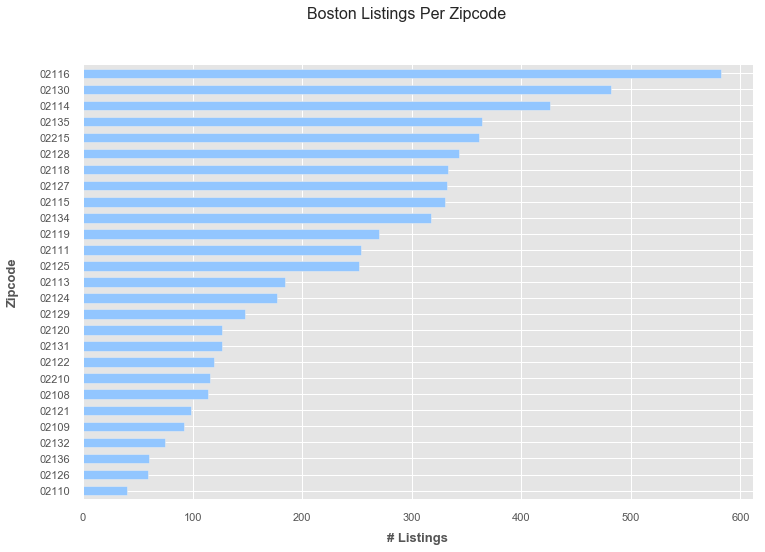

In [47]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(12,8))
hood = boston.zipcode.value_counts().head(27).sort_values()
hood.plot(kind="barh", width=.6)
plt.xlabel("# Listings", labelpad = 10, size = 13, weight='bold')
plt.ylabel("Zipcode", labelpad=20, size = 13, weight='bold')
plt.suptitle("Boston Listings Per Zipcode", size = 16)